# Problem Set 2, due April 20 at 11:59am (i.e., noon).

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on Canvas). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from Canvas. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 1|
|progresa |treatment =1|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|schooling in 1997|

---

## Part 1: Descriptive analysis

### 1.1	Summary Statistics

Present summary statistics (mean and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name. Do NOT simply expect the grader to scroll through your output!

In [30]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import sklearn
import scipy.stats as stats
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [31]:
pdata = pd.read_csv('data/progresa_sample.csv')

In [32]:
pdata.head()

,year,sex,indig,dist_sec,sc,grc,fam_n,min_dist,dist_cap,poor,...,hohedu,hohwag,welfare_index,hohsex,hohage,age,village,folnum,grc97,sc97
0,97,0.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,13,163,1,7,1.0
1,98,0.0,0.0,4.473,1.0,8.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,14,163,1,7,1.0
2,97,1.0,0.0,4.473,1.0,6.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,12,163,2,6,1.0
3,98,1.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,13,163,2,6,1.0
4,97,0.0,0.0,4.473,1.0,2.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,8,163,3,2,1.0


In [33]:
pdataSum = pdata.drop(['folnum', 'village', 'year'], axis=1)
pdataSum = pdataSum.describe().loc[['mean', 'std']].transpose().sort_index(ascending='false')
pdataSum

,mean,std
age,11.366460,3.167744
dist_cap,147.674452,76.063134
dist_sec,2.418910,2.234109
fam_n,7.215715,2.352900
grc,3.963537,2.499063
grc97,3.705372,2.572387
hohage,44.436717,11.620372
hohedu,2.768104,2.656106
hohsex,0.925185,0.263095
hohwag,586.985312,788.133664


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages? Hint: Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 for individuals who are poor (i.e., poor=='pobre').

Present your results in a single table with the following columns and 14 (or so) rows:

| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male|?|?|?|?|


In [34]:
pdataV = pdata.drop(['folnum', 'village'], axis=1)
base = pdataV[(pdataV['year'] == 97) & (pdataV['poor'] == 'pobre')].drop(['year', 'poor'], axis=1)

# base.head()

In [35]:
baseline = pd.DataFrame(columns=('Variable name', 'Average value (Treatment villages)', 'Average value (Control villages)', 'Difference (Treat - Control)', 'p-value'))
for column in base:
    if column != 'progresa':
        treat = base[base['progresa'] == 'basal'][column]
        control = base[base['progresa'] == '0'][column]
        meanT = treat.mean()
        meanC = control.mean()
        tstat, pval = stats.ttest_ind(treat.fillna(0), control.fillna(0))
        baseline.loc[len(baseline)]=[column, meanT, meanC, meanT - meanC, pval]

In [36]:
baseline.set_index(['Variable name']).sort_index(ascending='false')

,Average value (Treatment villages),Average value (Control villages),Difference (Treat - Control),p-value
Variable name,,,,
age,10.716991,10.742023,-0.025032,4.785594e-01
dist_cap,150.829074,153.769730,-2.940656,8.415005e-04
dist_sec,2.453122,2.507662,-0.054540,3.569843e-02
fam_n,7.281327,7.302469,-0.021142,4.271039e-01
grc,3.531599,3.543050,-0.011450,6.890151e-01
grc97,3.531599,3.543050,-0.011450,6.890151e-01
hohage,43.648828,44.276918,-0.628090,1.515918e-06
hohedu,2.663139,2.590348,0.072791,1.105093e-02
hohsex,0.924656,0.922947,0.001709,6.217737e-01


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

A
Yes, for more than half of the variables there is a statistically significant difference between the means of the treatment and control villages for the baseline with using alpha = 0.05.

B
This matters because this means that for some variables there are inherent statistical differences to begin with. For these experiments we always want to consider the counterfactual (the enrollment of students in poor villages in asbence of the progresa treatment). If there is a statistical difference in the baseline, then it's harder to judge the counterfactual and the impact of the actual treatments.

C.
This makes measuring impact with single difference because we can't assume that the outcomes in the treatment and control groups would have been the same since there are statistical differences to begin with. A difference in difference approach is probably best in this situation.

### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average enrollment rate in 1997. Create a scatterplot that shows this relationship. What do you notice?

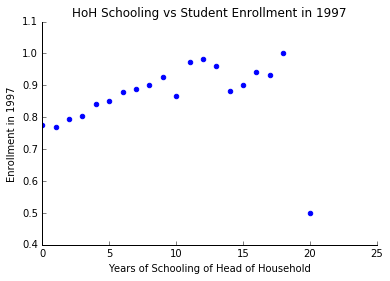

In [87]:
ge1 = pdata[pdata['year'] == 97][['hohedu', 'sc']].dropna().groupby('hohedu').mean()
# ge1

%matplotlib inline
ax = plt.subplot(111)
y = ge1['sc']
x = ge1.index.values
ax.scatter(x, y, color='blue')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlim(xmin=0)
plt.ylabel('Enrollment in 1997')
plt.xlabel('Years of Schooling of Head of Household')
plt.title('HoH Schooling vs Student Enrollment in 1997')
plt.show()

In general, as the number of years of schooling the head of household has, the more likely it is that the child has been enrolled for 1997. There's a slight discontinuity at around 14 years of schooling for HoH and this can either be attributed to the tradeoffs of continuing education or the number of data we have available. We see a very low rate of enrollment when the HoH has 20 years of schooling but this is most likely to due sample size.

### 1.5 Graphical exploration, part 2

Create a histogram of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. Create two separate histograms showing the distribution of these average enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households). Does there appear to be a difference? Is this difference statistically significant?

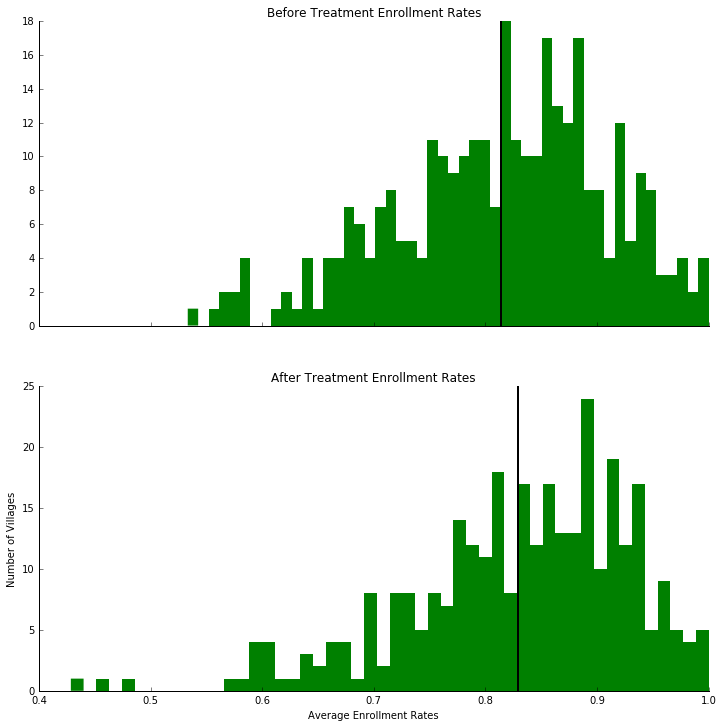

In [84]:
ge2 = pdata[(pdata['progresa'] == 'basal') & (pdata['poor'] == 'pobre')][['village', 'sc', 'year']]
ge2
meanBe = ge2[ge2['year'] == 97].groupby('village').mean()
meanBe.mean() # 0.8138
meanAf = ge2[ge2['year'] == 98].groupby('village').mean()
meanAf.mean() # 0.829

%matplotlib inline
fig, [ax1, ax2] = plt.subplots(2, sharex=True, figsize=(12,12))
ax1.hist(meanBe['sc'].dropna(), bins=50, color='green', edgecolor='none')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.axvline(x=meanBe.mean()['sc'], linewidth=2, color='black')

ax2.hist(meanAf['sc'].dropna(), bins=50, color='green', edgecolor='none')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')
ax2.axvline(x=meanAf.mean()['sc'], linewidth=2, color='black')

plt.xlabel('Average Enrollment Rates')
plt.ylabel('Number of Villages')
ax1.set_title('Before Treatment Enrollment Rates')
ax2.set_title('After Treatment Enrollment Rates')
plt.show()

In [86]:
tstat, pval = stats.ttest_ind(meanBe['sc'].fillna(0), meanAf['sc'].fillna(0))
pval

0.04424870036572115

There does seem to be a (visible) difference between the after and before treatment affects on enrollment rates in the poor villages when we look at the overall average enrollment rates. Before was 0.8138 and it increased to 0.8208 after the treatment. Statistically, we do have a significant difference because the p-value of 0.044 is less than our alpha of 0.05 so we reject the null hypothesis.

## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on the social and economic outcomes of individuals in Mexico. We will focus on the impact of the program on the poor (those with poor=='pobre'), since only the poor were eligible to receive the PROGRESA assistance.

### 2.1 Simple differences: T-test

Begin by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment), calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages. Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [119]:
sdtt = pdata[(pdata['poor'] == 'pobre') & (pdata['year'] == 98)][['sc', 'progresa']]
ctrl = sdtt[sdtt['progresa'] == '0']['sc']
treat = sdtt[sdtt['progresa'] == 'basal']['sc']
tstat, pval = stats.ttest_ind(ctrl.fillna(0), treat.fillna(0))
print tstat, pval

-7.25719065579 4.03997709032e-13


The difference in the average enrollment rate among poor households in control and treatment villages after the treatment is statistically significant because the p-value of 4.03e-13 is less than alpha, 0.05, so we reject the null hypothesis that the means are the same (the treatment has no effect). This means that, statistically, the treatment had a positive impact on the treated villages and this can be seen as a success, again statistically speaking.

### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. Discuss the following:

* Based on this model, how much did Progresa increase the likelihood of a child enrolling?
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [129]:
sdr = smf.ols(formula='sc ~ progresa', data=pdata[(pdata['year'] == 98) & (pdata['poor'] == 'pobre')])
sdr_result = sdr.fit()

In [130]:
sdr_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Fri, 22 Apr 2016   Prob (F-statistic):           6.64e-17
Time:                        21:36:03   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             0.8076      0.004    220.676      0.000         0.800     0.815
progresa[T.basal]     0.0388      0.005      8.359      0.000         0.030     0.048
==============================================================================
Omnibus:                     7638.939   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15767.534
Skew:                          -1.767   Prob(JB):                         0.00
Kurtosis:                       4.140   Cond. No.                         3.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
print sdr_result.pvalues

Intercept            0.000000e+00
progresa[T.basal]    6.636344e-17
dtype: float64


Progresa increased the likelihood of a child enrolling by 0.0388 or 3.88% from the already 80.76% "chance" that they would have already enrolled (the interecept).
We can reject the null hypothesis because the p-value is less than alpha.
What would the outcome have been in terms of child enrollment in schools if there were no treatment in the poor villages? Our main assumption here is that the enrollment would have stayed the same in absence of progresa treatment for both treatment and control groups. 

### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, welfare index, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [132]:
mr = smf.ols(formula='sc ~ progresa + sex + fam_n', data=pdata[(pdata['year'] == 98) & (pdata['poor'] == 'pobre')])
mr_r = mr.fit()

In [133]:
mr_r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     42.12
Date:                Fri, 22 Apr 2016   Prob (F-statistic):           3.77e-27
Time:                        21:36:09   Log-Likelihood:                -11892.
No. Observations:               27440   AIC:                         2.379e+04
Df Residuals:                   27436   BIC:                         2.383e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             0.8322      0.008     99.085      0.000         0.816     0.849
progresa[T.basal]     0.0384      0.005      8.260      0.000         0.029     0.047
sex                   0.0244      0.005      5.411      0.000         0.016     0.033
fam_n                -0.0050      0.001     -5.147      0.000        -0.007    -0.003
==============================================================================
Omnibus:                     7608.999   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15669.343
Skew:                          -1.762   Prob(JB):                         0.00
Kurtosis:                       4.136   Cond. No.                         30.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

I chose to add in the sex of the child and the family size. It seems that factoring these two in makes it so that the progresa treatment is 0.0004 less effective. But adding these two factors doesn't seem to change the standard error of the progresa variable.
It's worth noting that when the child is male (sex = 1), it raises the likelihood the child will enroll after treatment by 2.44% which is about two thirds the affect of the treatment itself. It would be interesting to find out whether that is just the normal rate, or if males/females benefit more from the treatment. Also we can see a negative correlation between family size and the likelihood of a child enrolling in school after treatment. Other than these two factors, the progresa treatment itself doesn't seem to change by a huge margin.

### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in control villages. The difference between these two differences is your estimate.

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [145]:
ddT = pdata[(pdata['progresa'] == 'basal') & (pdata['poor'] == 'pobre')]
diffT = ddT[ddT['year'] == 98]['sc'].mean() - ddT[ddT['year'] == 97]['sc'].mean()


ddC = pdata[(pdata['progresa'] == '0') & (pdata['poor'] == 'pobre')]
diffC = ddC[ddC['year'] == 98]['sc'].mean() - ddC[ddC['year'] == 97]['sc'].mean()

dind = diffT - diffC
dind

0.031331280319323085

The result we get for the difference-in-difference appraoch is 0.0313 meaning the progresa treatment has an impact of 0.0313 on children's likelihood of enrollment from 0 to 1. The main assumption is that in absence of the progresa treatment, the outcome in terms of enrollment would have been the same in both treatment and control groups, assume parallel trends.

### 2.5 Difference-in-Difference, version 2 (regression)

Now use a regression specification to estimate the average treatment effects of the program in a difference-in-differences framework. Include at least 5 control variables.

* What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* How do these estimates of the treatment effect compare to the estimates based on the simple difference?
* How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?
* What is the counterfactual assumption underlying this regression? 

In [146]:
ddr98 = smf.ols(formula='sc ~ progresa', data=pdata[(pdata['year'] == 98) & (pdata['poor'] == 'pobre')]).fit()
ddr97 = smf.ols(formula='sc ~ progresa', data=pdata[(pdata['year'] == 97) & (pdata['poor'] == 'pobre')]).fit() 

In [148]:
ddr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Fri, 22 Apr 2016   Prob (F-statistic):           6.64e-17
Time:                        23:44:00   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             0.8076      0.004    220.676      0.000         0.800     0.815
progresa[T.basal]     0.0388      0.005      8.359      0.000         0.030     0.048
==============================================================================
Omnibus:                     7638.939   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15767.534
Skew:                          -1.767   Prob(JB):                         0.00
Kurtosis:                       4.140   Cond. No.                         3.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [150]:
ddr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.785
Date:                Fri, 22 Apr 2016   Prob (F-statistic):             0.0952
Time:                        23:45:53   Log-Likelihood:                -14305.
No. Observations:               30922   AIC:                         2.861e+04
Df Residuals:                   30920   BIC:                         2.863e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             0.8152      0.004    230.159      0.000         0.808     0.822
progresa[T.basal]     0.0075      0.005      1.669      0.095        -0.001     0.016
==============================================================================
Omnibus:                     7746.340   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15037.477
Skew:                          -1.664   Prob(JB):                         0.00
Kurtosis:                       3.770   Cond. No.                         3.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
dindr = ddr1.params[1] - ddr2.params[1]

In [157]:
dind - dindr

7.7021722333370235e-16

The estimates of the impact of the progresa program we find is 0.0313. What this number means is that for poor households in Mexico who were under the treatment group of the progresa program, they increased the children's likelihood of enrolling into school by 3.13% after treatment.
The estimates using the difference in difference approach is similar to but lesser than the impact seen from the simple difference approach, which was 0.0388.
The difference between the two difference in difference approaches was incredibly small (7.7e-16). Any differences that could appear could be due to the way we calculated the differences. In the regression approach we implemented an ordinary least squares method to estimate the regression model, where in 2.4 we more simple took averages.
The counterfactual assumption for this one is the same as in 2.4, that the outcome in both treatment and control groups would have been the same in the absence of treatment and that there would be parallel trends to begin with.

### 2.6 Summary

* Based on all the analysis you have undertaken to date, do you believe that Progresa had a causal impact on the enrollment rates of poor households in Mexico? 
* Describe one other way that you might analyze these data to further investigate the causal impact of Progresa on enrollment, and clearly state the counterfactual assumption you would need to make for that approach to be valid.  *(Hint: Consider using the non-poor in your analysis)*

Yes, I think that the progresa program has/had a causal impact on the enrollment rates of poor households in Mexico. We get similar results from single difference and difference-in-difference methods which both seem to show the impact of the progresa program. Our analysis has shown that progresa treatment increases the likelihood of enrollment by more than 3% in poor households and I see this as a positive causal impact which is also backed up by the ttests for statistical significance.
One other way we could investigate the effectiveness of the progresa program would be to test for differences between poor and non-poor enrollment in treatment and control groups using difference in difference approach. The main assumption in this case would be in the absence of the progresa treatment, the enrollment in the treatment and control groups would be the same for non-poor and the enrollment in treatment/control groups would be the same for the poor.